# Initialize

## Load Libraries

In [1]:
import numpy as np
import random
import scipy.special
#matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
%matplotlib inline

## Define functions

In [2]:
def binomial(n, k, p):
    return scipy.special.binom(n,k)*p**k*(1-p)**(n-k)

#def poisson(mu, k):
#        return np.exp(-mu)*(mu**k)/(np.math.factorial(k))

from scipy.stats import poisson

# Main

## Simulation des Experiments

In [3]:
# Totzeit
t_tot = 100 * 1e-9 #s 
# Anzahl der Messintervalle
n_t = 10001

t = np.linspace(0, t_tot*(n_t - 1), n_t)

In [4]:
# Wahrscheinlichkeit ein Photon in einem Zeitintervall t_tot zu detektieren
p = 0.05

# Ergebnisvektor
counts = np.zeros(n_t)

for i, ti in enumerate(t):
    x = random.random()
    if x>(1-p):
        counts[i] = 1

In [5]:
# Gesamtanzahl der gemessenen Photonen
n_counts = int(np.sum(counts))
print('Anzahl der gemessenen Photonen = {:d}'.format(n_counts))

Anzahl der gemessenen Photonen = 472


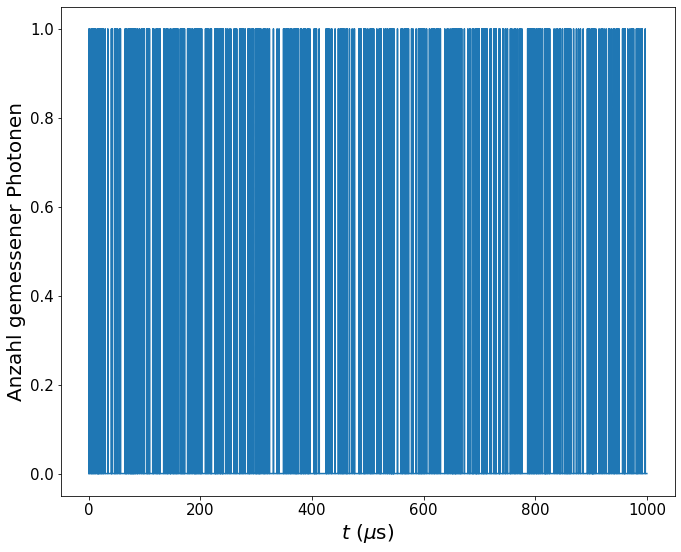

In [6]:
# Plotte Ergebnis
plt.figure(
    num=1,
    figsize=(11, 9),
    facecolor='white')
plt.xlabel(r'$t$ ($\mu$s)', fontsize=20)
plt.ylabel(r'Anzahl gemessener Photonen', fontsize=20)
plt.xscale('linear')
plt.yscale('linear')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(t/1e-6, counts)

plt.show()

### Zeitliches binning

In [7]:
# zeitliche Länge eines Bins
t_bin = 5 * 1e-6 #s
# Anzahl der Bins
n_bin = np.int(t_tot*(n_t - 1)/t_bin)

# Anzahl der gemessenen Photonen pro Bin
counts_bin = np.zeros(n_bin)
# Bins
bins = np.zeros(n_bin)
bin_size = int((n_t - 1) / n_bin)
# Histogram
hist = np.zeros(n_counts)
hist_bins = range(0, n_counts)

In [8]:
for i in range(0, n_bin):
    # Anzahl der gemessenen Photonen in Bin i
    counts_bin[i] = np.sum(counts[i*bin_size:(i + 1)*bin_size])
    # Zeit an der das Bin endet
    bins[i] = t_bin*i
    # Histogram
    hist[int(counts_bin[i])] = hist[int(counts_bin[i])] + 1

### Plotte Ergebnis

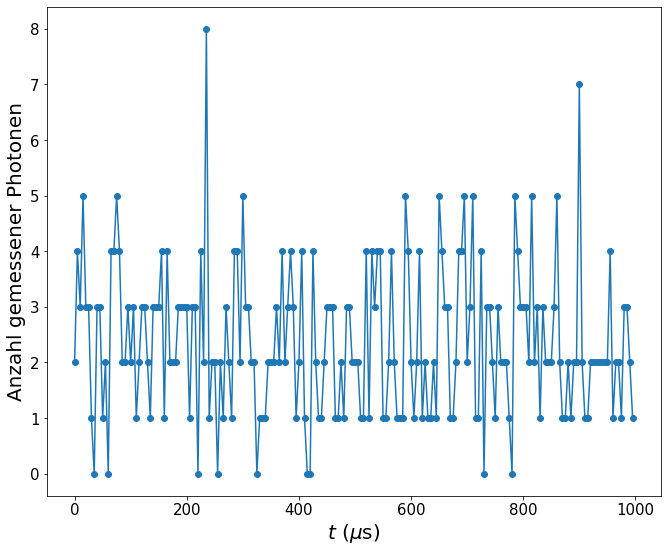

In [9]:

plt.figure(
    num=1,
    figsize=(11, 9),
    facecolor='white')
plt.xlabel(r'$t$ ($\mu$s)', fontsize=20)
plt.ylabel(r'Anzahl gemessener Photonen', fontsize=20)
plt.xscale('linear')
plt.yscale('linear')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(bins/1e-6, counts_bin, 'o-')

plt.show()

### Plotte Histogram

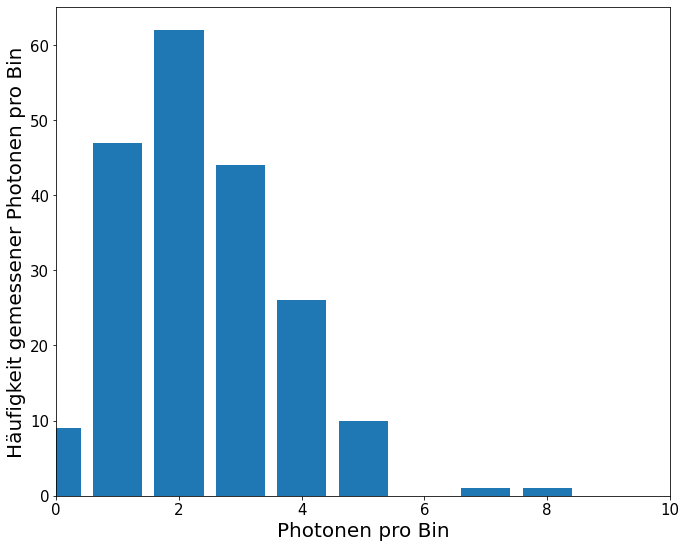

In [10]:
plt.figure(
    num=1,
    figsize=(11, 9),
    facecolor='white')
plt.xlabel(r'Photonen pro Bin', fontsize=20)
plt.ylabel(r'Häufigkeit gemessener Photonen pro Bin', fontsize=20)
plt.xscale('linear')
plt.yscale('linear')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.bar(hist_bins, hist)
plt.xlim(0, 10)
plt.show()

### Plotte PMF

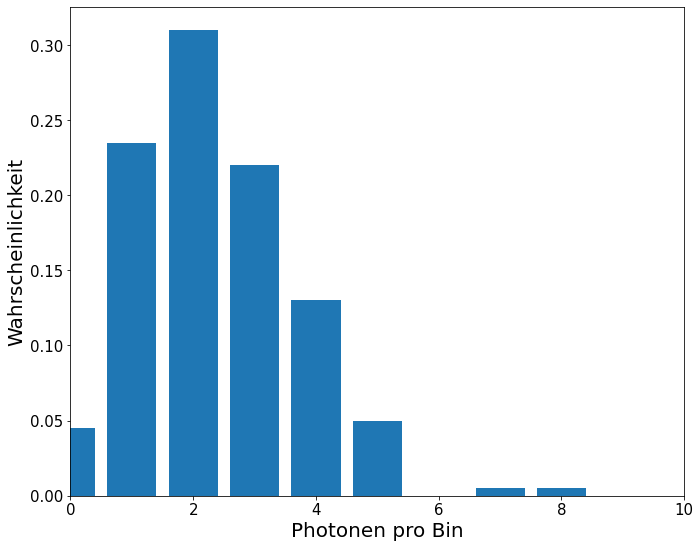

In [11]:
plt.figure(
    num=1,
    figsize=(11, 9),
    facecolor='white')
plt.xlabel(r'Photonen pro Bin', fontsize=20)
plt.ylabel(r'Wahrscheinlichkeit', fontsize=20)
plt.xscale('linear')
plt.yscale('linear')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.bar(hist_bins, hist/n_bin)
plt.xlim(0, 10)
plt.show()

## Berechnen von Mittelwert und Varianz bzw Standardabweichung

In [12]:
mean = np.mean(counts_bin)
var = np.var(counts_bin)

print('Mean = {:0.2f}'.format(mean))
print('var = {:0.2f}'.format(var))
print('std = {:0.2f}'.format(np.sqrt(var)))

Mean = 2.36
var = 1.78
std = 1.33


In [13]:
# Berechne Wahrscheinlichkeiten
P = np.zeros(len(hist_bins))

for i, ki in enumerate(hist_bins):
    #P[i] = poisson(mean, int(ki))
    P[i] = poisson.pmf(int(ki), mean)

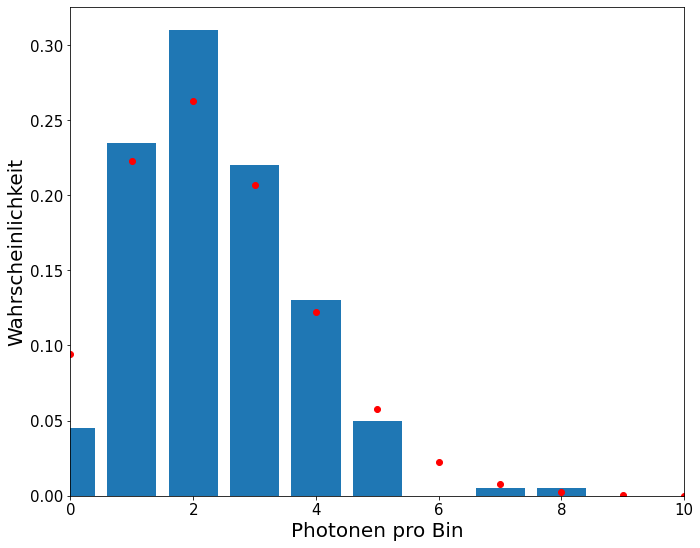

In [14]:
# Plotte PMF
plt.figure(
    num=1,
    figsize=(11, 9),
    facecolor='white')
plt.xlabel(r'Photonen pro Bin', fontsize=20)
plt.ylabel(r'Wahrscheinlichkeit', fontsize=20)
plt.xscale('linear')
plt.yscale('linear')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.bar(hist_bins, hist/n_bin)
plt.plot(hist_bins, P, 'ro')
plt.xlim(0, 10)
plt.show()